<a href="https://colab.research.google.com/github/LimaCharlie84/propitious-scholar/blob/main/ML_project_molecular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My First ML project**






# **Load data**

In [4]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# **Data preparation**



### **Data separation as X and Y - Input and target variables**

In [5]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [6]:
X = df.drop('logS', axis=1)  # =1 means its in column mode, whereas =0 means row mode
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### **Data splitting**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [8]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [9]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


# **Model Building**



## **Linear regression**


### **Training the model**

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

### **Applying the model to make a prediction**

In [11]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [14]:
y_train

,logS
107,-4.440
378,-1.250
529,-1.655
546,-1.886
320,-0.740
...,...
802,-2.925
53,-2.680
350,-7.020
79,-4.800


In [12]:
print(y_lr_train_pred)

[-2.83668969  0.84208401 -0.50930302 -0.13058053 -1.6269208  -2.86103037
 -2.32208333 -4.16684323 -5.04235077 -2.29737009 -3.15082845 -4.33037208
 -1.43700682 -2.59060064 -7.09025955 -2.32734557 -4.19073421 -2.63904005
 -3.58104074 -3.75929058 -2.5501665  -3.26968347 -2.78911367 -2.69251051
 -0.77437547 -6.61955792 -2.99084623 -2.36975061 -7.18167736 -1.52816491
 -4.81736265 -0.86996608 -7.09025955 -1.87404275 -2.58013247 -4.80953284
 -4.17454084 -1.95444152 -3.50503339 -2.7411418  -1.87131835 -2.45270806
 -3.07252433 -1.48988982 -3.98778754 -1.35216679 -0.16932277 -6.05237002
 -3.29550658  0.30513174 -3.25501463 -5.31993586 -0.4733928  -4.79180882
 -5.82486323 -2.70343539 -3.70838271 -2.4987341  -2.12301018 -3.11393974
 -2.79842053 -1.38274662 -4.3267103  -3.57778946 -3.42356884 -9.15826626
 -6.52588866 -1.75832085 -4.97842312 -1.59255758 -1.91317252 -2.81075595
 -1.14056747 -1.6326702  -1.6269208  -5.33227425 -3.88805074  0.70432882
 -3.99288096 -2.22595859 -2.63405871 -1.80643013 -4

In [13]:
print(y_lr_test_pred)

[-3.05722870e+00 -7.77785827e+00 -2.55016650e+00 -2.01523582e+00
 -2.06375990e+00 -9.99672215e-01 -5.94603364e-01 -5.53626003e-01
 -5.72200956e+00 -3.94006681e+00 -3.95496755e+00 -2.29737009e+00
 -1.48980354e+00 -1.48988982e+00 -4.64510806e+00 -1.90396018e+00
 -1.51566313e+00 -3.16424605e+00 -3.70863920e+00 -5.58105660e+00
 -3.25038467e+00 -5.04235077e+00 -5.69194881e+00 -2.14339849e+00
 -4.35689341e+00 -5.03964756e+00 -3.10383618e+00 -4.40286964e+00
 -4.21276272e+00  5.56508349e-01 -1.45537678e+00 -4.41027396e+00
 -2.59668773e+00 -1.53336276e+00 -5.55749874e-01 -1.67111795e+00
 -2.78163675e+00 -3.15395565e+00 -5.27083361e+00 -1.75321446e+00
 -1.53350725e+00 -2.01255666e+00 -6.57559167e+00 -7.89433046e+00
 -5.76437127e+00 -4.16422068e+00 -3.43694663e+00  1.43834212e+00
 -1.12679105e-02 -2.34521849e+00 -1.86480046e+00 -5.03964756e+00
  8.55886378e-01 -3.17679292e+00 -5.06764094e+00 -1.99464442e+00
 -7.77785827e+00 -1.21764693e+00 -9.09541075e-01 -5.04235077e+00
 -2.43898748e+00 -2.84034

### **Evaluate performance**

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# training set
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

#test set
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)



In [26]:
print('LR MSE (Train):' , lr_train_mse)
print('LR R2 (Train):' , lr_train_r2)
print('LR MSE (Test):' , lr_test_mse)
print('LR R2 (Test):' , lr_test_r2)

LR MSE (Train): 1.0075362951093687
LR R2 (Train): 0.7645051774663391
LR MSE (Test): 1.0206953660861033
LR R2 (Test): 0.7891616188563282


In [42]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Methods', 'Training MSE', 'Training R2','Test MSE', 'Test R2']

In [30]:
lr_results

,Methjods,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

### **Training the model**



In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make predictions**

In [34]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluating the model performance**

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# training set
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

#test set
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)


In [38]:
print('RF MSE (Train):' , rf_train_mse)
print('RF R2 (Train):' , rf_train_r2)
print('RF MSE (Test):' , rf_test_mse)
print('RF R2 (Test):' , rf_test_r2)

RF MSE (Train): 1.028227802112806
RF R2 (Train): 0.7596688824431413
RF MSE (Test): 1.407688264904896
RF R2 (Test): 0.7092230211002489


In [39]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Methods', 'Training MSE', 'Training R2','Test MSE', 'Test R2']
rf_results

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


### **Model comparison**

In [46]:
df_models = pd.concat([lr_results, rf_results], axis=0)

df_models.reset_index(drop=True)

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# **Data Visualisation of prediction results**

Text(0.5, 0, 'Experimental LogS')

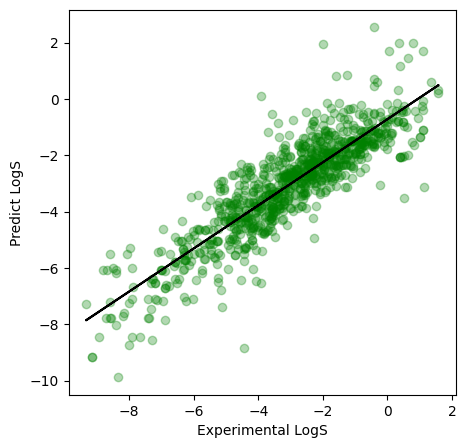

In [49]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="green", alpha=0.3)

# trend line
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), c='black')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')